In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-whitegrid")

In [2]:
dqn = pd.read_csv('DQN.csv')
duel = pd.read_csv('DuelDQN.csv')
double = pd.read_csv('DoubleDQN.csv')
cer = pd.read_csv('CERDQN.csv')

In [19]:
class LogParser:
    def __init__(self, csv, nrows):
        self.df = pd.read_csv(csv, nrows=nrows)
    
    @property
    def score(self):
        return self.df["score"].values
    
    @property
    def reward(self):
        return self.df["reward"].values
    
    def _avg(self, vals, epoch):
        num = vals.shape[0]
        vals = vals.reshape(num // epoch, -1)
        return np.average(vals, axis=1)
    
    def _max(self, vals, epoch):
        num = vals.shape[0]
        vals = vals.reshape(num // epoch, -1)
        return np.max(vals, axis=1)
    
    def avg_score(self, epoch):
        return self._avg(self.score, epoch)

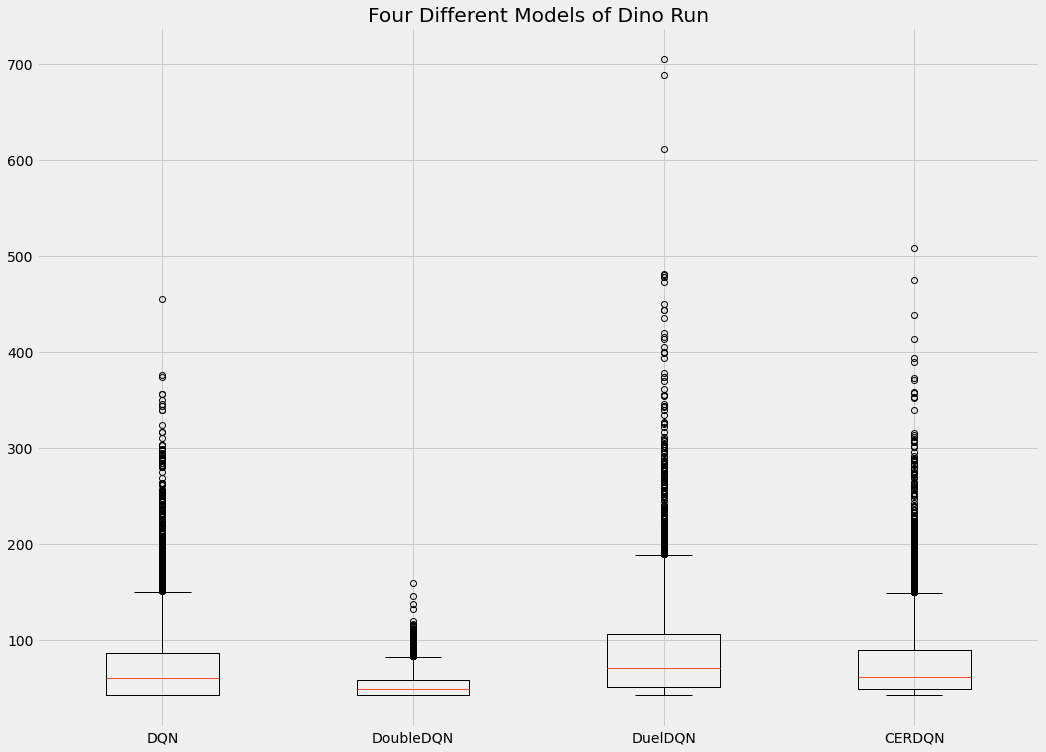

In [12]:
plt.figure(figsize=(16, 12))
labels = 'DQN', 'DoubleDQN', 'DuelDQN', 'CERDQN'
plt.title('Four Different Models of Dino Run')
plt.boxplot([dqn.score, double.score, duel.score, cer.score], labels=labels)
plt.show()

In [34]:
nrows = 5e3
dqn = LogParser("DQN.csv", nrows)
double_dqn = LogParser("DoubleDQN.csv", nrows)
duel_dqn = LogParser("DuelDQN.csv", nrows)
cer_dqn = LogParser("CERDQN.csv", nrows)

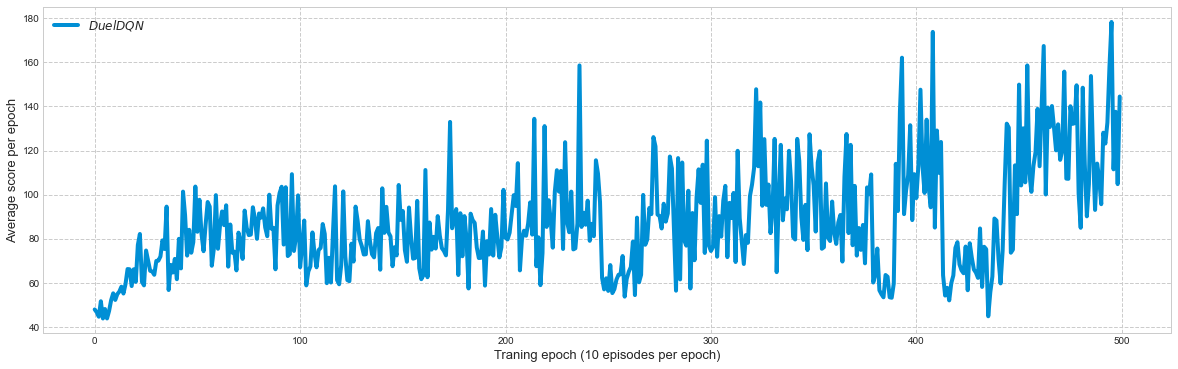

In [35]:
plt.figure(figsize=(18, 6))
plt.plot(duel_dqn.avg_score(10), label=r'$DuelDQN$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
plt.savefig("exp-duel.png", dpi=100)

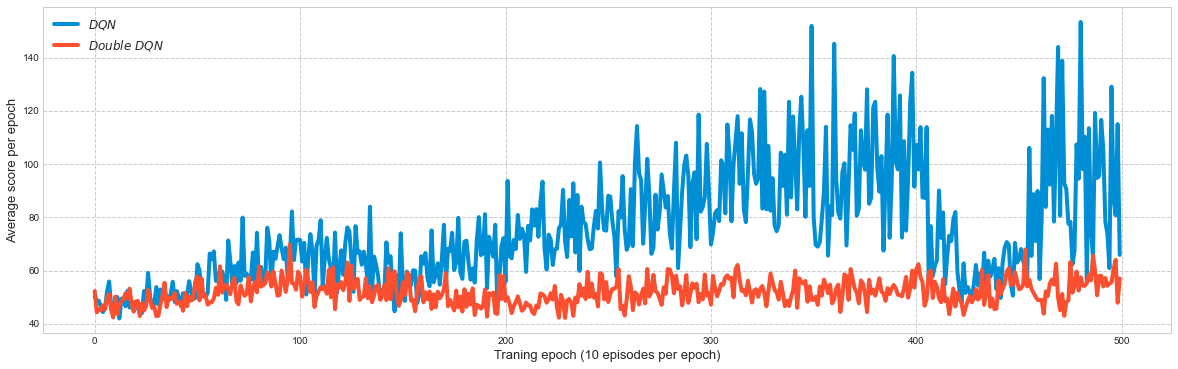

In [38]:
plt.figure(figsize=(18, 6))
plt.plot(dqn.avg_score(10), label=r'$DQN$')
plt.plot(double_dqn.avg_score(10), label=r'$Double\,\,DQN$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
plt.savefig("exp-double-dqn.png", dpi=100)

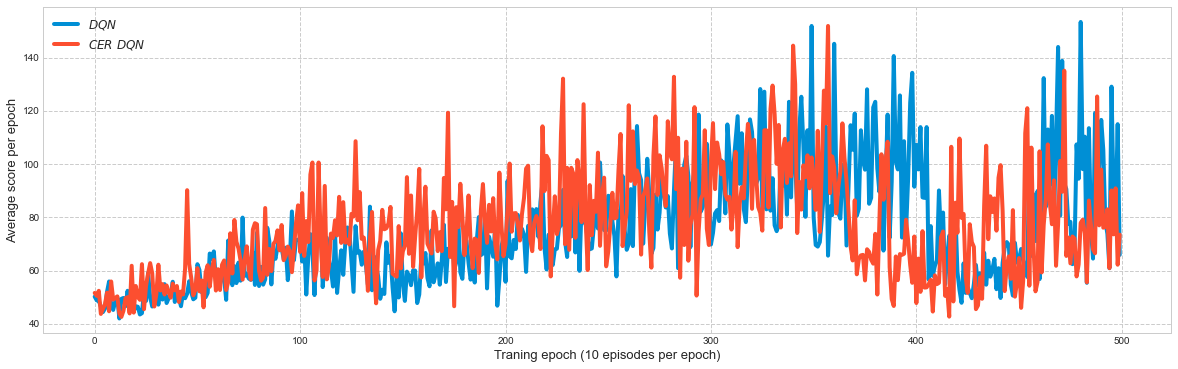

In [39]:
plt.figure(figsize=(18, 6))
plt.plot(dqn.avg_score(10), label=r'$DQN$')
plt.plot(cer_dqn.avg_score(10), label=r'$CER\,\,DQN$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
plt.savefig("exp-cer-dqn.png", dpi=100)

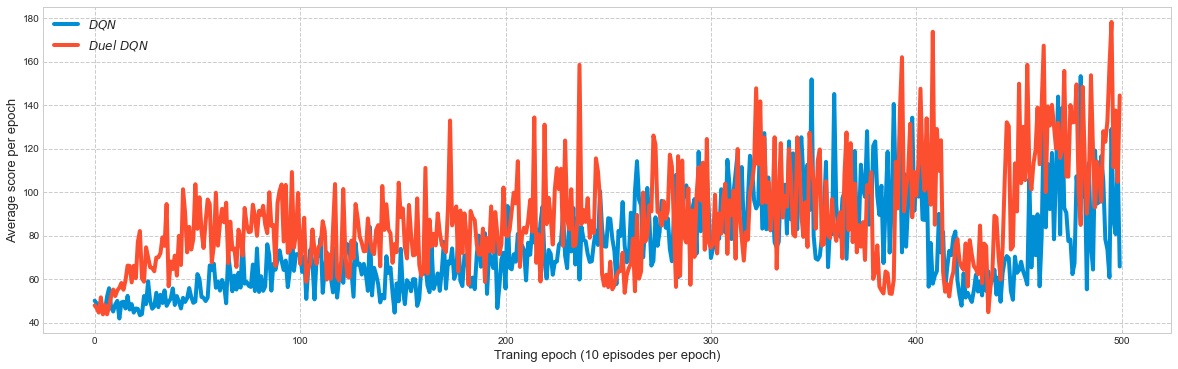

In [40]:
plt.figure(figsize=(18, 6))
plt.plot(dqn.avg_score(10), label=r'$DQN$')
plt.plot(duel_dqn.avg_score(10), label=r'$Duel\,\,DQN$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
plt.savefig("exp-duel-dqn.png", dpi=100)